<a href="https://colab.research.google.com/github/pmaryh09/Intro-ML-S25/blob/main/assingment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Name:** Maritza Perez
**Student id:** 801203851
**Assignment 1**

**Problem 1**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display

site = "https://raw.githubusercontent.com/pmaryh09/Intro-ML-S25/refs/heads/main/D3.csv"
df = pd.read_csv(site)

print(df.shape)
df.head()



(100, 4)


,X1,X2,X3,Y
0,0.000000,3.440000,0.440000,4.387545
1,0.040404,0.134949,0.888485,2.679650
2,0.080808,0.829899,1.336970,2.968490
3,0.121212,1.524848,1.785455,3.254065
4,0.161616,2.219798,2.233939,3.536375


In [2]:
print(df.columns)
print(df.dtypes)

x1=df["X1"].values
x2=df["X2"].values
x3=df["X3"].values
Y=df["Y"].values

m = len(Y)  #num of traning examples

x0 = np.ones((m,1))
X1 = np.hstack((x0,x1.reshape(m,1)))
X2 = np.hstack((x0,x2.reshape(m,1)))
X3 = np.hstack((x0,x3.reshape(m,1)))

iterations = 1500
alpha = [0.01, 0.05, 0.10] #learning rates


Index(['X1', 'X2', 'X3', 'Y'], dtype='object')
X1    float64
X2    float64
X3    float64
Y     float64
dtype: object


In [3]:
def costFunc(X, y, theta):
  m = len(y)
  predictions = X.dot(theta)
  errors = np.subtract(predictions,y)
  sqrErrors = np.square(errors)
  J = 1 / (2*m) * np.sum(sqrErrors)
  return J

# Gradient Descent Function
def gradient_descent(X,y,alpha,iterations):
    m=len(y)
    theta=np.zeros(X.shape[1])
    cost_history=np.zeros(iterations)

    for i in range(iterations):
        predictions=X.dot(theta)
        errors=np.subtract(predictions,y)
        sum_delta=(alpha / m) * X.transpose().dot(errors)
        theta -= sum_delta
        cost_history[i]=costFunc(X,y,theta)

    return theta, cost_history

In [4]:
def computeGradientDescentAlphas(X, y, alphas, iterations, name="Model"):
    thetas = []
    cost_histories = []
    results = []  # List to store results for table creation

    # Perform gradient descent for each learning rate
    for a in alphas:
        final_theta, cost_history = gradient_descent(X, y, a, iterations)
        thetas.append(final_theta)
        cost_histories.append(cost_history)
        results.append(
            {
                "Model": name,
                "Alpha": a,
                "Thetas": final_theta,
                "Final Cost": cost_history[-1],
            }
        )

    # Create and display the table
    df_results = pd.DataFrame(results)
    print(f"Results for {name}:\n")
    display(df_results)
    print("\n")

    return thetas, cost_histories


Results for X1 Model:



,Model,Alpha,Thetas,Final Cost
0,X1 Model,0.01,"[5.718506528385593, -1.9568205977732744]",0.990589
1,X1 Model,0.05,"[5.927948595755642, -2.0383365082076943]",0.984993
2,X1 Model,0.10,"[5.927948918061593, -2.038336633650798]",0.984993


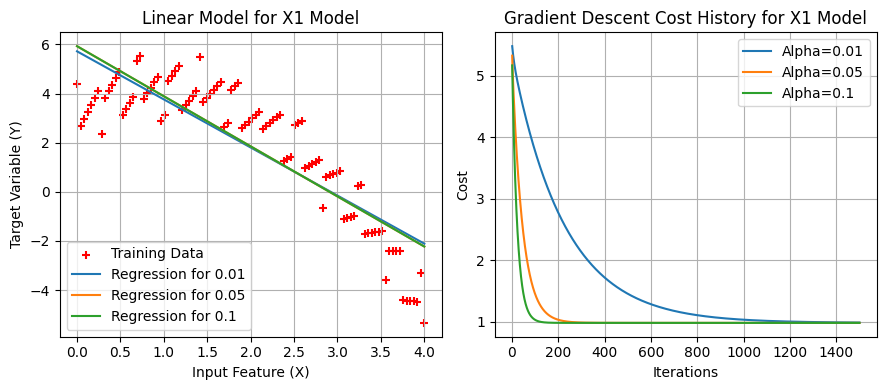

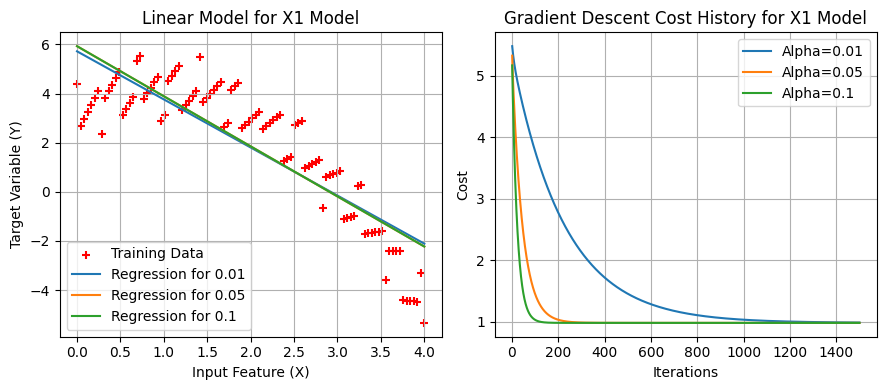

In [5]:
def funcPlot(X,Y,alpha,thetas,cost_histories,iterations,name=""):
    plt.figure(figsize=(9,4))

    # Plot training data and regression lines
    plt.subplot(1,2,1)
    plt.scatter(X[:,1],Y,color='red',marker='+',label='Training Data')

    # Plot regression lines for different alphas
    for i in range(len(alpha)):
        plt.plot(X[:,1],X.dot(thetas[i]),label=f'Regression for {alpha[i]}')

    plt.grid(True)
    plt.legend()
    plt.title(f'Linear Model for {name}')
    plt.xlabel('Input Feature (X)')
    plt.ylabel('Target Variable (Y)')

    # Plot cost histories for different alphas
    plt.subplot(1,2,2)
    for i in range(len(alpha)):
        plt.plot(range(1,len(cost_histories[i]) + 1),cost_histories[i],label=f'Alpha={alpha[i]}')

    plt.grid(True)
    plt.legend()
    plt.title(f'Gradient Descent Cost History for {name}')
    plt.xlabel('Iterations')
    plt.ylabel('Cost')

    plt.tight_layout()
    plt.show()

# Compute gradient descent
thetas_x1, cost_histories_x1 = computeGradientDescentAlphas(X1, Y, alpha, iterations, name="X1 Model")

# Call the plotting function
funcPlot(X1, Y, alpha, thetas_x1, cost_histories_x1, iterations, name="X1 Model")

funcPlot(X1, Y, alpha, thetas_x1, cost_histories_x1, iterations, name="X1 Model")
plt.show()  # Force display


**Problem 2**

In [8]:
# @title Combined Results
def predict_value(x_in,theta_in):
    y=theta_in[0]
    for x_val,theta_val in zip(x_in,theta_in[1:]):
      y += x_val * theta_val
    return y

reshaped_x1 = x1.reshape(m,1)
reshaped_x2 = x2.reshape(m,1)
reshaped_x3 = x3.reshape(m,1)

total_data=np.hstack((x0,reshaped_x1,reshaped_x2,reshaped_x3))

# Compute thetas and cost histories
combinedTheta,combinedCostHistory=computeGradientDescentAlphas(total_data,Y,alpha,iterations,"Combined")


Results for Combined:



,Model,Alpha,Thetas,Final Cost
0,Combined,0.01,"[4.151187282528127, -1.839429097710375, 0.7247...",0.810510
1,Combined,0.05,"[5.311281361517259, -2.0033116002156244, 0.533...",0.738465
2,Combined,0.10,"[5.314165627499571, -2.0037190505172755, 0.532...",0.738464


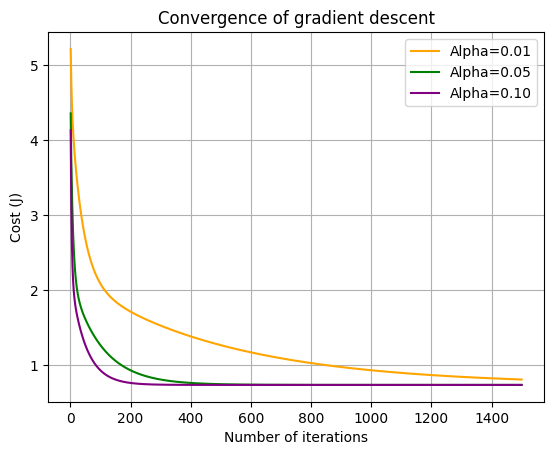

In [9]:
# @title Convergence of gradient descent
plt.plot(range(1,iterations + 1),combinedCostHistory[0],color='orange',label='Alpha=0.01')
plt.plot(range(1,iterations + 1),combinedCostHistory[1],color='green',label='Alpha=0.05')
plt.plot(range(1,iterations + 1),combinedCostHistory[2],color='purple',label='Alpha=0.10')
plt.rcParams["figure.figsize"]=(10,6)
plt.grid(True)

plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.legend()
plt.title('Convergence of gradient descent')
plt.show()

In [10]:
# @title Y Value Predictions
def predict_value(x_in,theta_in):
    y=theta_in[0]
    for x_val,theta_val in zip(x_in,theta_in[1:]):
        y += x_val * theta_val
    return y

# Predict the values using best_theta
values = [[1, 1, 1], [2, 0, 4], [3, 2, 1]]
predictions = []

for i,value_set in enumerate(values):
    y = predict_value(value_set, combinedTheta[2])
    predictions.append(y)
    print(f"Prediction {i+1}: {y}")

# Print thetas for the alpha=0.10 model
print(f"\nThetas for alpha = 0.10: {combinedTheta[2]}")

Prediction 1: 3.577408529345462
Prediction 2: 0.2443209702176523
Prediction 3: 0.1025340197359193

Thetas for alpha = 0.10: [ 5.31416563 -2.00371905  0.53256359 -0.26560164]
